In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
%matplotlib inline

In [2]:
%cd D:\MSC\Trimester2\LabonML\Datasets

D:\MSC\Trimester2\LabonML\Datasets


In [3]:
%pwd

'D:\\MSC\\Trimester2\\LabonML\\Datasets'

In [4]:
class AnalysisUtils:
    def load_dataset(self, csvfilename, testpercent):
        dataset = pd.read_csv(csvfilename)
        dataset.info()
        
        #Train Test Split 
        ds_train, ds_test = train_test_split(dataset, test_size= testpercent, random_state=0)
        return ds_train,ds_test

In [5]:
myutils = AnalysisUtils()

In [6]:
trainset, testset = myutils.load_dataset('hotel_bookings.csv',0.2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
type(trainset)

pandas.core.frame.DataFrame

In [8]:
trainset["hotel"].value_counts()

City Hotel      63405
Resort Hotel    32107
Name: hotel, dtype: int64

In [9]:
trainset.shape

(95512, 32)

In [10]:
trainset.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [11]:
trainset.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
55159,City Hotel,1,66,2016,August,32,6,2,2,3,...,No Deposit,9.0,NaN,0,Transient,168.3,0,0,Canceled,2016-06-02
56190,City Hotel,1,51,2016,August,36,31,1,4,2,...,No Deposit,9.0,NaN,0,Transient,123.3,0,0,Canceled,2016-08-12
97444,City Hotel,0,22,2016,September,38,15,0,1,1,...,No Deposit,9.0,NaN,0,Transient,149.0,0,2,Check-Out,2016-09-16
64854,City Hotel,1,69,2017,March,11,17,2,3,2,...,No Deposit,9.0,NaN,0,Transient,153.0,0,0,Canceled,2017-02-12
110580,City Hotel,0,14,2017,April,17,25,0,4,2,...,No Deposit,14.0,NaN,0,Transient,324.5,1,2,Check-Out,2017-04-29


In [12]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95512 entries, 55159 to 68268
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           95512 non-null  object 
 1   is_canceled                     95512 non-null  int64  
 2   lead_time                       95512 non-null  int64  
 3   arrival_date_year               95512 non-null  int64  
 4   arrival_date_month              95512 non-null  object 
 5   arrival_date_week_number        95512 non-null  int64  
 6   arrival_date_day_of_month       95512 non-null  int64  
 7   stays_in_weekend_nights         95512 non-null  int64  
 8   stays_in_week_nights            95512 non-null  int64  
 9   adults                          95512 non-null  int64  
 10  children                        95509 non-null  float64
 11  babies                          95512 non-null  int64  
 12  meal                        

In [13]:
testset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23878 entries, 5627 to 35158
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           23878 non-null  object 
 1   is_canceled                     23878 non-null  int64  
 2   lead_time                       23878 non-null  int64  
 3   arrival_date_year               23878 non-null  int64  
 4   arrival_date_month              23878 non-null  object 
 5   arrival_date_week_number        23878 non-null  int64  
 6   arrival_date_day_of_month       23878 non-null  int64  
 7   stays_in_weekend_nights         23878 non-null  int64  
 8   stays_in_week_nights            23878 non-null  int64  
 9   adults                          23878 non-null  int64  
 10  children                        23877 non-null  float64
 11  babies                          23878 non-null  int64  
 12  meal                         

Data contains int,float,object type values
Null values are present in the columns name,host_name,last_review,reviews_per_month

<AxesSubplot:>

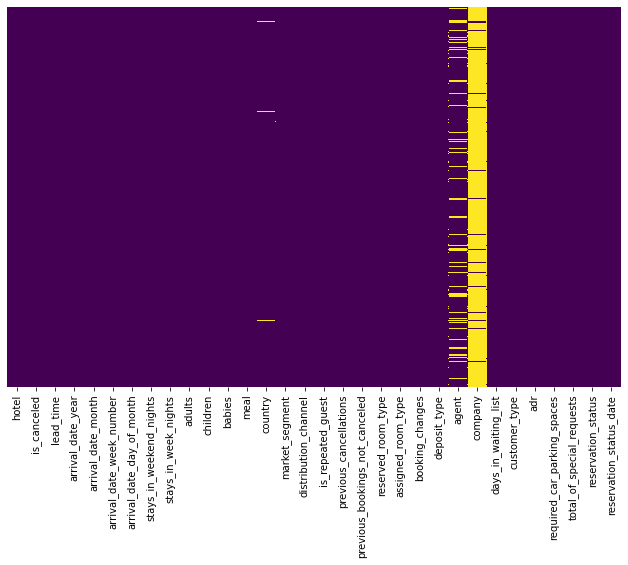

In [15]:
plt.figure(figsize=(11,7))
sns.heatmap(trainset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

array([[<AxesSubplot:title={'center':'is_canceled'}>,
        <AxesSubplot:title={'center':'lead_time'}>,
        <AxesSubplot:title={'center':'arrival_date_year'}>,
        <AxesSubplot:title={'center':'arrival_date_week_number'}>],
       [<AxesSubplot:title={'center':'arrival_date_day_of_month'}>,
        <AxesSubplot:title={'center':'stays_in_weekend_nights'}>,
        <AxesSubplot:title={'center':'stays_in_week_nights'}>,
        <AxesSubplot:title={'center':'adults'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'babies'}>,
        <AxesSubplot:title={'center':'is_repeated_guest'}>,
        <AxesSubplot:title={'center':'previous_cancellations'}>],
       [<AxesSubplot:title={'center':'previous_bookings_not_canceled'}>,
        <AxesSubplot:title={'center':'booking_changes'}>,
        <AxesSubplot:title={'center':'agent'}>,
        <AxesSubplot:title={'center':'company'}>],
       [<AxesSubplot:title={'center':'days_in_waiting_list'}>,


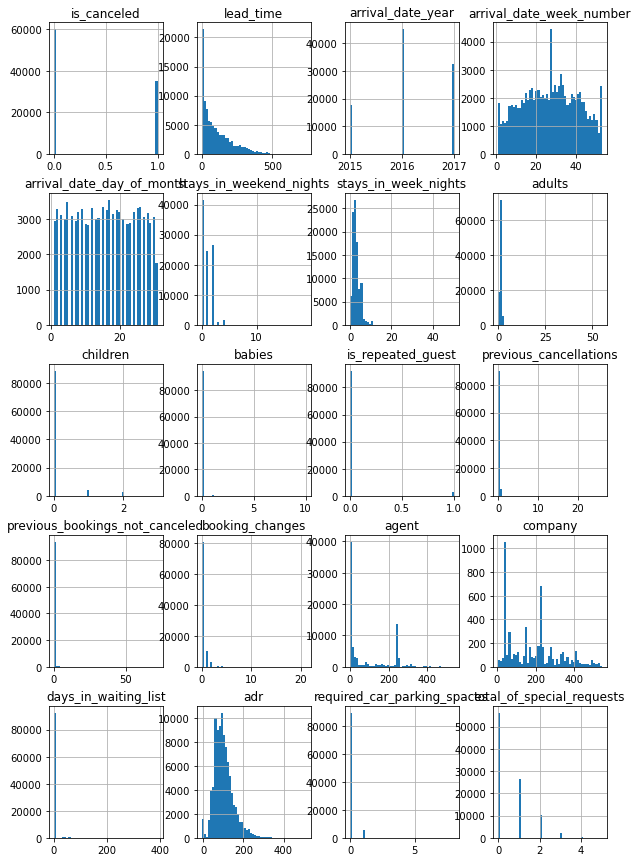

In [16]:
trainset.hist(bins=50,figsize=(10,15))

In [17]:
ds_corr_matrix = trainset.corr()

In [18]:
ds_corr_matrix

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.290949,0.018308,0.004402,-0.006717,-0.001193,0.022794,0.059151,0.004641,-0.031893,-0.086102,0.109524,-0.058099,-0.145957,-0.084311,-0.029471,0.055740,0.048659,-0.194877,-0.237795
lead_time,0.290949,1.000000,0.040404,0.125568,0.002060,0.088789,0.166608,0.118250,-0.036780,-0.022255,-0.124611,0.085799,-0.073412,0.000207,-0.070609,0.150102,0.170382,-0.065098,-0.116679,-0.095061
arrival_date_year,0.018308,0.040404,1.000000,-0.540582,0.000789,0.022365,0.034308,0.030787,0.052813,-0.013448,0.010647,-0.119444,0.027768,0.027041,0.063004,0.263181,-0.056271,0.208086,-0.013856,0.107588
arrival_date_week_number,0.004402,0.125568,-0.540582,1.000000,0.067377,0.016318,0.012609,0.023347,0.004487,0.009187,-0.027639,0.034182,-0.021916,0.007619,-0.031166,-0.077014,0.022572,0.078527,0.004376,0.027225
arrival_date_day_of_month,-0.006717,0.002060,0.000789,0.067377,1.000000,-0.016867,-0.026978,-0.003175,0.015798,-0.000621,-0.006983,-0.026702,0.001550,0.011089,0.000584,0.047005,0.024139,0.032538,0.008146,0.004272
stays_in_weekend_nights,-0.001193,0.088789,0.022365,0.016318,-0.016867,1.000000,0.500523,0.092296,0.041179,0.016120,-0.087117,-0.011677,-0.042150,0.063575,0.139465,0.067204,-0.052557,0.051107,-0.018260,0.072595
stays_in_week_nights,0.022794,0.166608,0.034308,0.012609,-0.026978,0.500523,1.000000,0.091265,0.042172,0.017134,-0.095773,-0.014438,-0.049266,0.094774,0.180536,0.181097,-0.003040,0.066897,-0.025407,0.067984
adults,0.059151,0.118250,0.030787,0.023347,-0.003175,0.092296,0.091265,1.000000,0.029495,0.017842,-0.144171,-0.006247,-0.106565,-0.050047,-0.036987,0.201330,-0.008735,0.241357,0.015402,0.123162
children,0.004641,-0.036780,0.052813,0.004487,0.015798,0.041179,0.042172,0.029495,1.000000,0.024828,-0.031398,-0.024416,-0.020899,0.052191,0.039001,0.038945,-0.033291,0.339011,0.056566,0.080991
babies,-0.031893,-0.022255,-0.013448,0.009187,-0.000621,0.016120,0.017134,0.017842,0.024828,1.000000,-0.009215,-0.007111,-0.006277,0.082984,0.033857,0.020071,-0.010321,0.029165,0.038101,0.094826


<AxesSubplot:>

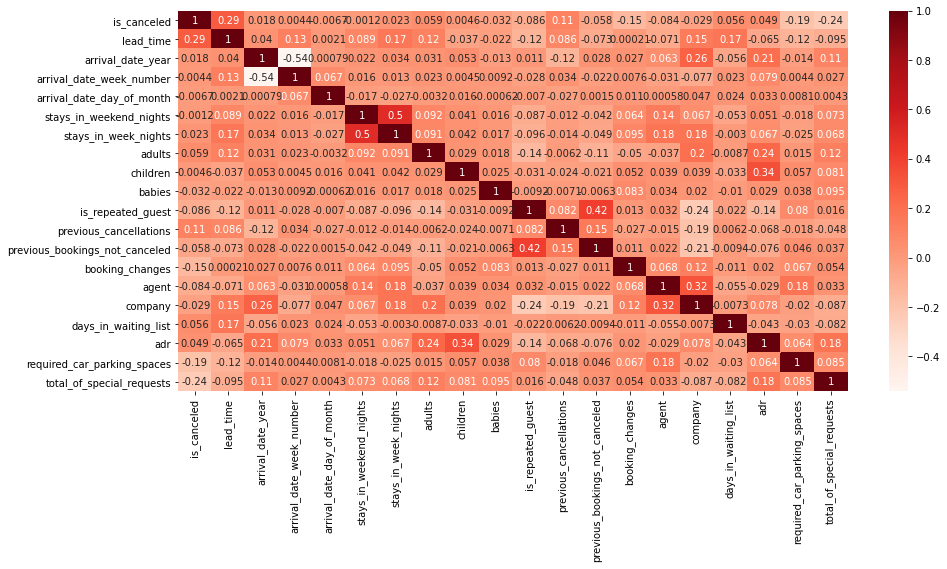

In [19]:
plt.figure(figsize=(15,7))
sns.heatmap(trainset.corr(),cbar=True, cmap='Reds',annot=True)

Text(0, 0.5, 'Total Bookings')

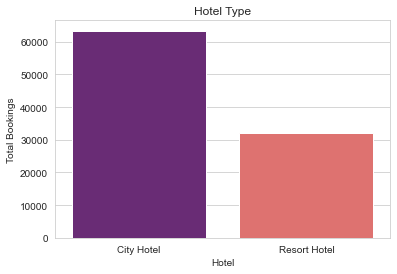

In [20]:
sns.set_style('whitegrid')
sns.countplot(x='hotel',data=trainset,palette="magma")
plt.title('Hotel Type')
plt.xlabel('Hotel')
plt.ylabel('Total Bookings')

There are more city hotels than Resort hotel

Text(0, 0.5, 'Total Count')

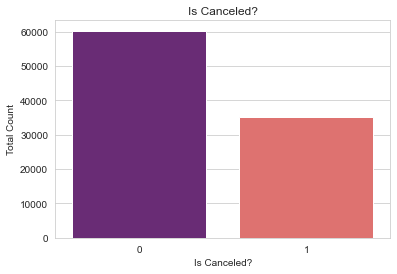

In [22]:
sns.set_style('whitegrid')
sns.countplot(x='is_canceled',data=trainset,palette="magma")
plt.title('Is Canceled?')
plt.xlabel('Is Canceled?')
plt.ylabel('Total Count')

More than 30,000 reservations were cancelled.

Text(0, 0.5, 'Total Count')

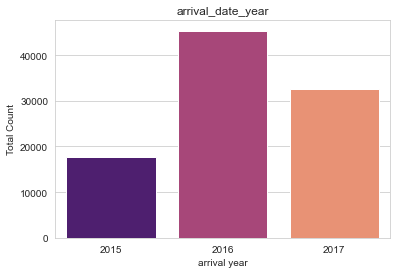

In [24]:
sns.countplot(x="arrival_date_year", data = trainset, palette="magma")
plt.title('arrival_date_year')
plt.xlabel('arrival year')
plt.ylabel('Total Count')

Text(0, 0.5, 'Count')

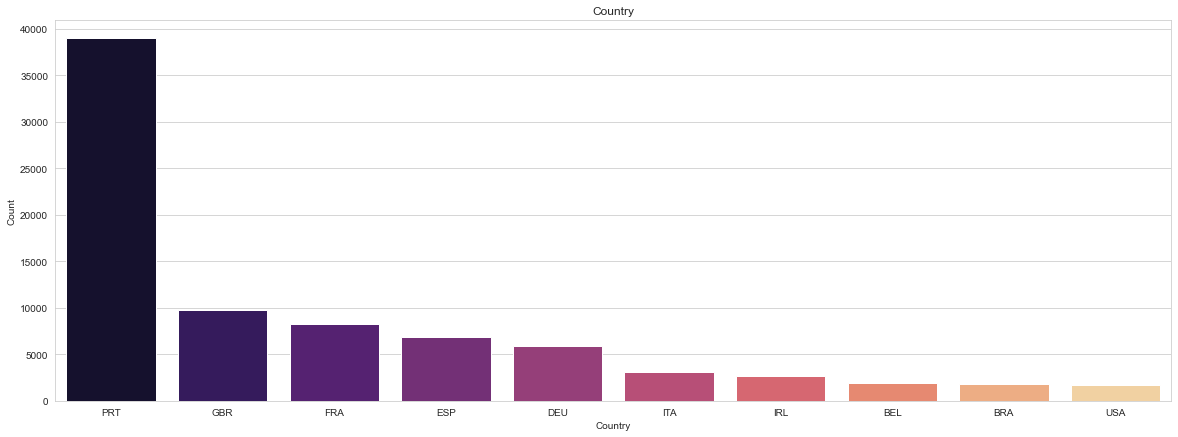

In [25]:
plt.figure(figsize=(20,7))
df_country = trainset['country'].value_counts().nlargest(10)
sns.barplot(x=df_country.index, y=df_country.values,palette="magma")
plt.title('Country')
plt.xlabel('Country')
plt.ylabel('Count')

Most of the guests belonged to Portugal

Text(0, 0.5, 'Count')

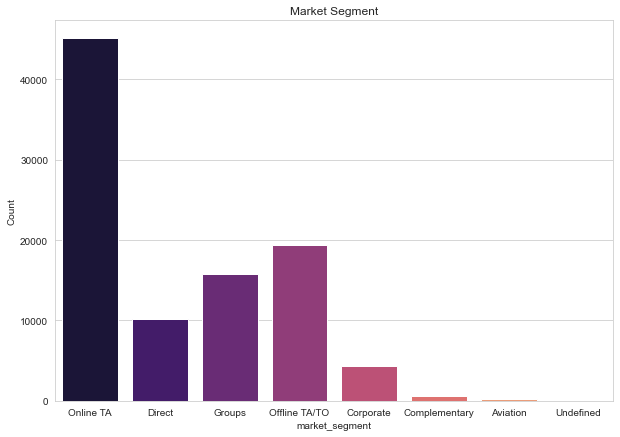

In [27]:
plt.figure(figsize=(10,7))
sns.countplot(x="market_segment", data = trainset, palette="magma")
plt.title('Market Segment')
plt.xlabel('market_segment')
plt.ylabel('Count')

Mostly online bookings were made

Text(0, 0.5, 'Count')

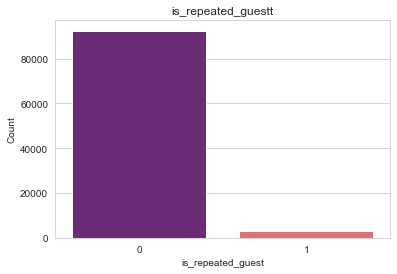

In [29]:
sns.countplot(x="is_repeated_guest", data = trainset, palette="magma")
plt.title('is_repeated_guestt')
plt.xlabel('is_repeated_guest')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

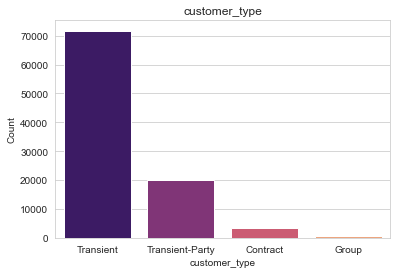

In [30]:
sns.countplot(x="customer_type", data = trainset, palette="magma")
plt.title('customer_type')
plt.xlabel('customer_type')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

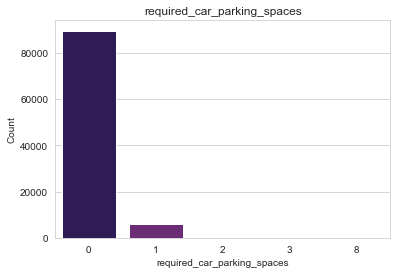

In [31]:
sns.countplot(x="required_car_parking_spaces", data = trainset, palette="magma")
plt.title('required_car_parking_spaces')
plt.xlabel('required_car_parking_spaces')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

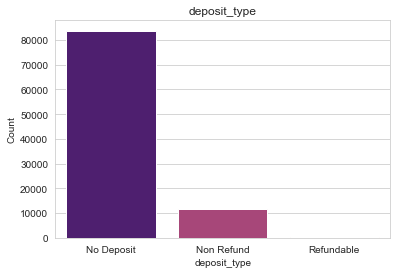

In [32]:
sns.countplot(x="deposit_type", data = trainset, palette="magma")
plt.title('deposit_type')
plt.xlabel('deposit_type')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

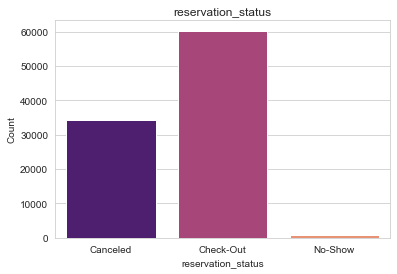

In [33]:
sns.countplot(x="reservation_status", data = trainset, palette="magma")
plt.title('reservation_status')
plt.xlabel('reservation_status')
plt.ylabel('Count')

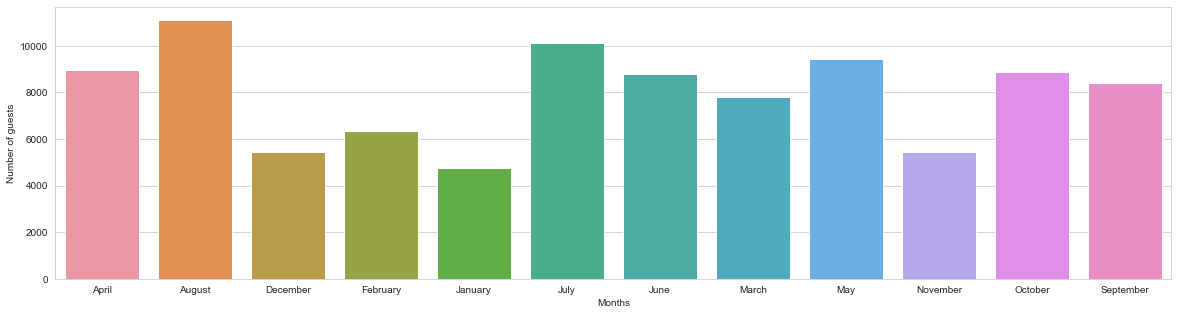

In [34]:
plt.figure(figsize=(20,5))
grouped_month = trainset.groupby("arrival_date_month")["hotel"].count()
months = grouped_month.index
sns.barplot(x=months, y=grouped_month)
plt.xlabel("Months")
plt.ylabel("Number of guests")
plt.show()

In [35]:
# August is the most demanded month and January is the least demanded

In [36]:
trainset.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              3
babies                                0
meal                                  0
country                             402
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             13127
company                           90059


"Country" column was filled with "PRT", because it is the most common country in this dataset.

In [37]:
trainset["country"] = trainset["country"].fillna(value="PRT")

In [38]:
trainset.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              3
babies                                0
meal                                  0
country                               0
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             13127
company                           90059


"Agent" and "Company" columns were deleted, because there are many empty rows.

In [39]:
trainset.drop(["company"], axis = 1, inplace = True)
trainset.drop(["agent"], axis = 1, inplace = True)

In [40]:
trainset.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          3
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In order to fill empty rows in "children" column, mean value of the column was calculated and filled.

In [41]:
average_children = round(trainset["children"].mean())

In [42]:
trainset["children"] = trainset["children"].fillna(value=average_children)

In [43]:
trainset.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

# OrdinalEncoder

In [44]:
ordinal_encoder = OrdinalEncoder()

In [45]:
hotel_encoded = ordinal_encoder.fit_transform(trainset[["hotel"]])

In [46]:
hotel_encoded

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [47]:
ordinal_encoder.categories_

[array(['City Hotel', 'Resort Hotel'], dtype=object)]

# OneHotEncoder

In [48]:
cat_encoder = OneHotEncoder()

In [49]:
X_train_onehot = cat_encoder.fit_transform(trainset[["hotel"]])

In [50]:
X_train_onehot

<95512x2 sparse matrix of type '<class 'numpy.float64'>'
	with 95512 stored elements in Compressed Sparse Row format>

In [51]:
print(X_train_onehot)

  (0, 0)	1.0
  (1, 0)	1.0
  (2, 0)	1.0
  (3, 0)	1.0
  (4, 0)	1.0
  (5, 1)	1.0
  (6, 1)	1.0
  (7, 1)	1.0
  (8, 0)	1.0
  (9, 1)	1.0
  (10, 0)	1.0
  (11, 0)	1.0
  (12, 1)	1.0
  (13, 1)	1.0
  (14, 1)	1.0
  (15, 1)	1.0
  (16, 0)	1.0
  (17, 0)	1.0
  (18, 1)	1.0
  (19, 0)	1.0
  (20, 0)	1.0
  (21, 1)	1.0
  (22, 0)	1.0
  (23, 0)	1.0
  (24, 1)	1.0
  :	:
  (95487, 0)	1.0
  (95488, 0)	1.0
  (95489, 0)	1.0
  (95490, 0)	1.0
  (95491, 1)	1.0
  (95492, 1)	1.0
  (95493, 1)	1.0
  (95494, 0)	1.0
  (95495, 0)	1.0
  (95496, 1)	1.0
  (95497, 0)	1.0
  (95498, 0)	1.0
  (95499, 0)	1.0
  (95500, 0)	1.0
  (95501, 0)	1.0
  (95502, 0)	1.0
  (95503, 0)	1.0
  (95504, 0)	1.0
  (95505, 0)	1.0
  (95506, 1)	1.0
  (95507, 0)	1.0
  (95508, 0)	1.0
  (95509, 0)	1.0
  (95510, 0)	1.0
  (95511, 0)	1.0


In [52]:
cat_encoder.categories_

[array(['City Hotel', 'Resort Hotel'], dtype=object)]

In [53]:
X_train_onehot = X_train_onehot.toarray()

In [54]:
X_train_onehot.shape

(95512, 2)

In [55]:
X_train_onehot_arr = pd.DataFrame(X_train_onehot, columns=['City Hotel', 'Resort Hotel'])

In [56]:
X_train_onehot_arr.head()

,City Hotel,Resort Hotel
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


In [57]:
trainset.shape, X_train_onehot_arr.shape

((95512, 30), (95512, 2))

We will use the join function on the dataframe to add the newly created columns.<br>
We will then remove the unwanted column - 'ocean_Proximity'

In [59]:
newdataset = trainset.join(X_train_onehot_arr)

In [60]:
newdataset

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,City Hotel,Resort Hotel
55159,City Hotel,1,66,2016,August,32,6,2,2,3,...,No Deposit,0,Transient,168.30,0,0,Canceled,2016-06-02,1.0,0.0
56190,City Hotel,1,51,2016,August,36,31,1,4,2,...,No Deposit,0,Transient,123.30,0,0,Canceled,2016-08-12,0.0,1.0
97444,City Hotel,0,22,2016,September,38,15,0,1,1,...,No Deposit,0,Transient,149.00,0,2,Check-Out,2016-09-16,NaN,NaN
64854,City Hotel,1,69,2017,March,11,17,2,3,2,...,No Deposit,0,Transient,153.00,0,0,Canceled,2017-02-12,0.0,1.0
110580,City Hotel,0,14,2017,April,17,25,0,4,2,...,No Deposit,0,Transient,324.50,1,2,Check-Out,2017-04-29,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45891,City Hotel,1,105,2015,November,48,26,0,3,2,...,No Deposit,0,Contract,72.25,0,3,Canceled,2015-11-13,1.0,0.0
117952,City Hotel,0,127,2017,August,32,9,0,3,3,...,No Deposit,0,Transient,195.00,0,2,Check-Out,2017-08-12,NaN,NaN
42613,City Hotel,0,8,2015,September,37,8,0,2,2,...,No Deposit,0,Transient,92.40,0,3,Check-Out,2015-09-10,0.0,1.0
43567,City Hotel,0,141,2015,September,39,20,1,0,2,...,No Deposit,0,Transient-Party,90.00,0,0,Check-Out,2015-09-21,1.0,0.0


In [61]:
newdataset.drop(columns="hotel", inplace=True)

In [62]:
newdataset.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,City Hotel,Resort Hotel
55159,1,66,2016,August,32,6,2,2,3,0.0,...,No Deposit,0,Transient,168.3,0,0,Canceled,2016-06-02,1.0,0.0
56190,1,51,2016,August,36,31,1,4,2,0.0,...,No Deposit,0,Transient,123.3,0,0,Canceled,2016-08-12,0.0,1.0
97444,0,22,2016,September,38,15,0,1,1,0.0,...,No Deposit,0,Transient,149.0,0,2,Check-Out,2016-09-16,NaN,NaN
64854,1,69,2017,March,11,17,2,3,2,2.0,...,No Deposit,0,Transient,153.0,0,0,Canceled,2017-02-12,0.0,1.0
110580,0,14,2017,April,17,25,0,4,2,2.0,...,No Deposit,0,Transient,324.5,1,2,Check-Out,2017-04-29,NaN,NaN
